# Visualización del Dataset Trusted 12x6

Este notebook muestra cómo se estructura y visualiza el dataset trusted que contiene secuencias de 12 frames de entrada y 6 frames de salida.

In [21]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sys
sys.path.append('..')
from src.visualization.visualizer import setup_custom_cmap



In [22]:
# Cargar dataset trusted
dataset_path = "../inputs/data_trusted_12x6_3m.h5"

def print_separator():
    print("=" * 50)

with h5py.File(dataset_path, "r") as h5_file:
    print_separator()
    print("INFORMACIÓN DEL DATASET TRUSTED")
    print_separator()
    print(f"Archivo: {os.path.basename(dataset_path)}")
    print(f"Fecha de creación: {h5_file.attrs['created_date']}")
    print(f"Rango de fechas: {h5_file.attrs['date_range']}")
    
    print_separator()
    print("ESTRUCTURA DEL MODELO")
    print_separator()
    print(f"Frames de entrada: {h5_file.attrs['input_frames']}")
    print(f"Frames de salida: {h5_file.attrs['output_frames']}")
    
    print_separator()
    print("ESTRUCTURA DEL ARCHIVO")
    print_separator()
    print("- inputs/      (secuencias de entrada)")
    print("- targets/     (secuencias objetivo)")
    print("- timestamps/  (timestamps para cada frame)")
    
    n_sequences = len(h5_file['inputs'])
    print(f"\nNúmero total de secuencias: {n_sequences}")
    print_separator()

INFORMACIÓN DEL DATASET TRUSTED
Archivo: data_trusted_12x6_3m.h5
Fecha de creación: 2025-05-18 14:50:48
Rango de fechas: 2024_10_03_01_00_00 to 2025_01_01_01_00_00
ESTRUCTURA DEL MODELO
Frames de entrada: 12
Frames de salida: 6
ESTRUCTURA DEL ARCHIVO
- inputs/      (secuencias de entrada)
- targets/     (secuencias objetivo)
- timestamps/  (timestamps para cada frame)

Número total de secuencias: 1207


In [30]:
def format_timestamp(ts_str):
    """Formatea el timestamp para mostrarlo en el título"""
    dt = datetime.strptime(ts_str, "%Y_%m_%d_%H_%M_%S")
    return dt.strftime("%Y/%m/%d %H:%M")

def visualize_sequence(sequence_idx):
    """Visualiza una secuencia completa del dataset"""
    with h5py.File(dataset_path, "r") as h5_file:
        # Obtener datos
        seq_name = f"sequence_{sequence_idx:05d}"
        inputs = h5_file['inputs'][seq_name][:]
        targets = h5_file['targets'][seq_name][:]
        
        # Obtener timestamps
        input_timestamps = [ts.decode() for ts in h5_file['timestamps'][f"{seq_name}_input"][:]] 
        target_timestamps = [ts.decode() for ts in h5_file['timestamps'][f"{seq_name}_target"][:]]
        
        # Configurar visualización
        n_rows = 3  # 2 filas para inputs, 1 para targets
        n_cols = 6  # 6 columnas para cada fila
        
        # Crear figura con espacio extra a la derecha para la colorbar
        fig = plt.figure(figsize=(22, 9))  # Aumentado el ancho para dar espacio a la colorbar
        
        # Crear grid para los subplots, dejando espacio para la colorbar
        gs = plt.GridSpec(n_rows, n_cols + 1, width_ratios=[1]*n_cols + [0.2],
                         left=0.05, right=0.95, bottom=0.05, top=0.92,
                         wspace=0.2, hspace=0.4)
        
        # Configurar colormap
        custom_cmap = setup_custom_cmap()
        
        # Configurar el título principal
        last_input_ts = format_timestamp(input_timestamps[-1])
        plt.suptitle(f'Predicción para {last_input_ts}', y=1.02, fontsize=14)
        
        # Función helper para dibujar el rectángulo central
        def draw_central_rectangle(ax, image):
            height, width = image.shape
            center_y, center_x = height // 2, width // 2
            rect_size = 32 // 2  # La mitad del tamaño del rectángulo (32x32)
            rect = plt.Rectangle((center_x - rect_size, center_y - rect_size),
                                32, 32, fill=False, color='black', linewidth=1)
            ax.add_patch(rect)
        
        # Mostrar frames de entrada (primeros 6)
        for i in range(6):
            ax = fig.add_subplot(gs[0, i])
            im = ax.imshow(inputs[i], cmap=custom_cmap, vmin=0, vmax=100)
            draw_central_rectangle(ax, inputs[i])
            ax.set_title(f'Input {i+1}\n{format_timestamp(input_timestamps[i])}')
            ax.axis('off')
        
        # Mostrar frames de entrada (últimos 6)
        for i in range(6, 12):
            ax = fig.add_subplot(gs[1, i-6])
            im = ax.imshow(inputs[i], cmap=custom_cmap, vmin=0, vmax=100)
            draw_central_rectangle(ax, inputs[i])
            ax.set_title(f'Input {i+1}\n{format_timestamp(input_timestamps[i])}')
            ax.axis('off')
        
        # Añadir línea punteada horizontal
        fig.add_artist(plt.Line2D([0.05, 0.90], [0.34, 0.34], color='white', linestyle='--', transform=fig.transFigure))
        
        # Mostrar frames objetivo
        for i in range(6):
            ax = fig.add_subplot(gs[2, i])
            im = ax.imshow(targets[i], cmap=custom_cmap, vmin=0, vmax=100)
            draw_central_rectangle(ax, targets[i])
            ax.set_title(f'Ground Truth {i+1}\n{format_timestamp(target_timestamps[i])}')
            ax.axis('off')
        
        # Añadir colorbar en la última columna del GridSpec
        cbar_ax = fig.add_subplot(gs[:, -1])
        cbar = plt.colorbar(im, cax=cbar_ax, orientation='vertical')
        cbar.set_label('Intensidad (0-100)', fontsize=10)
        
        # No usar tight_layout() para mantener los márgenes configurados
        plt.show()

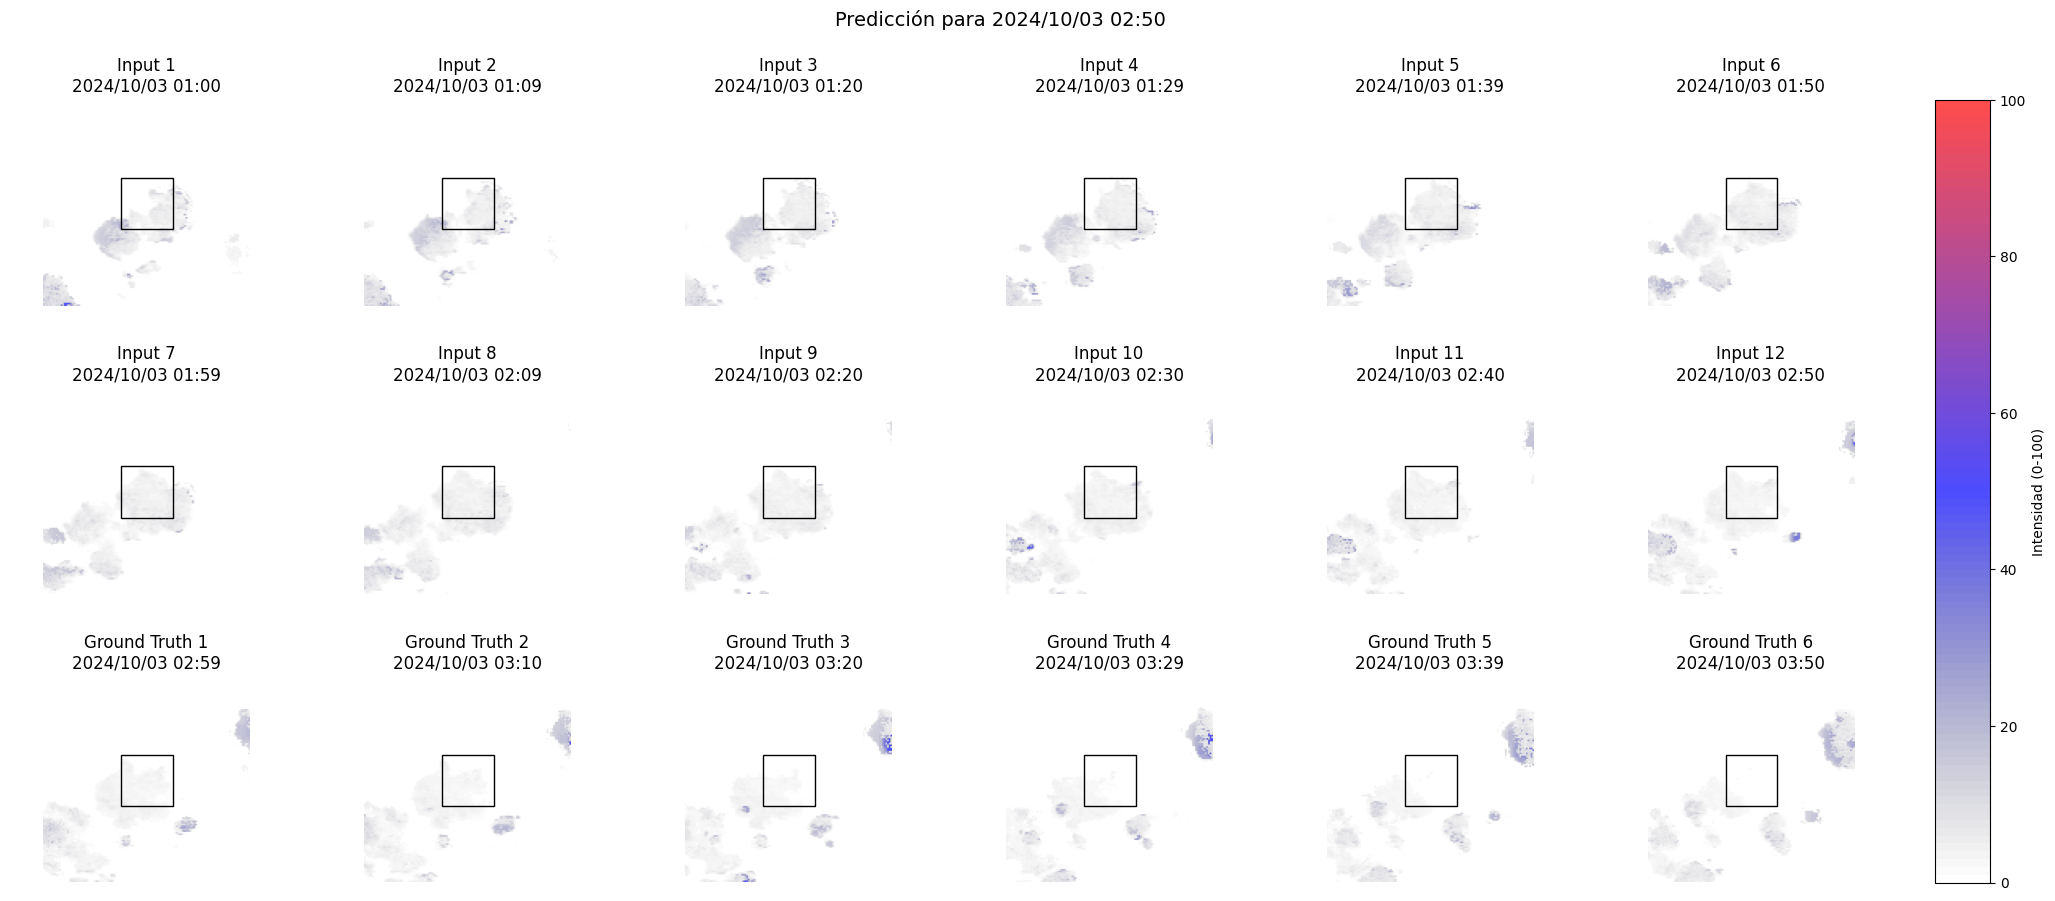

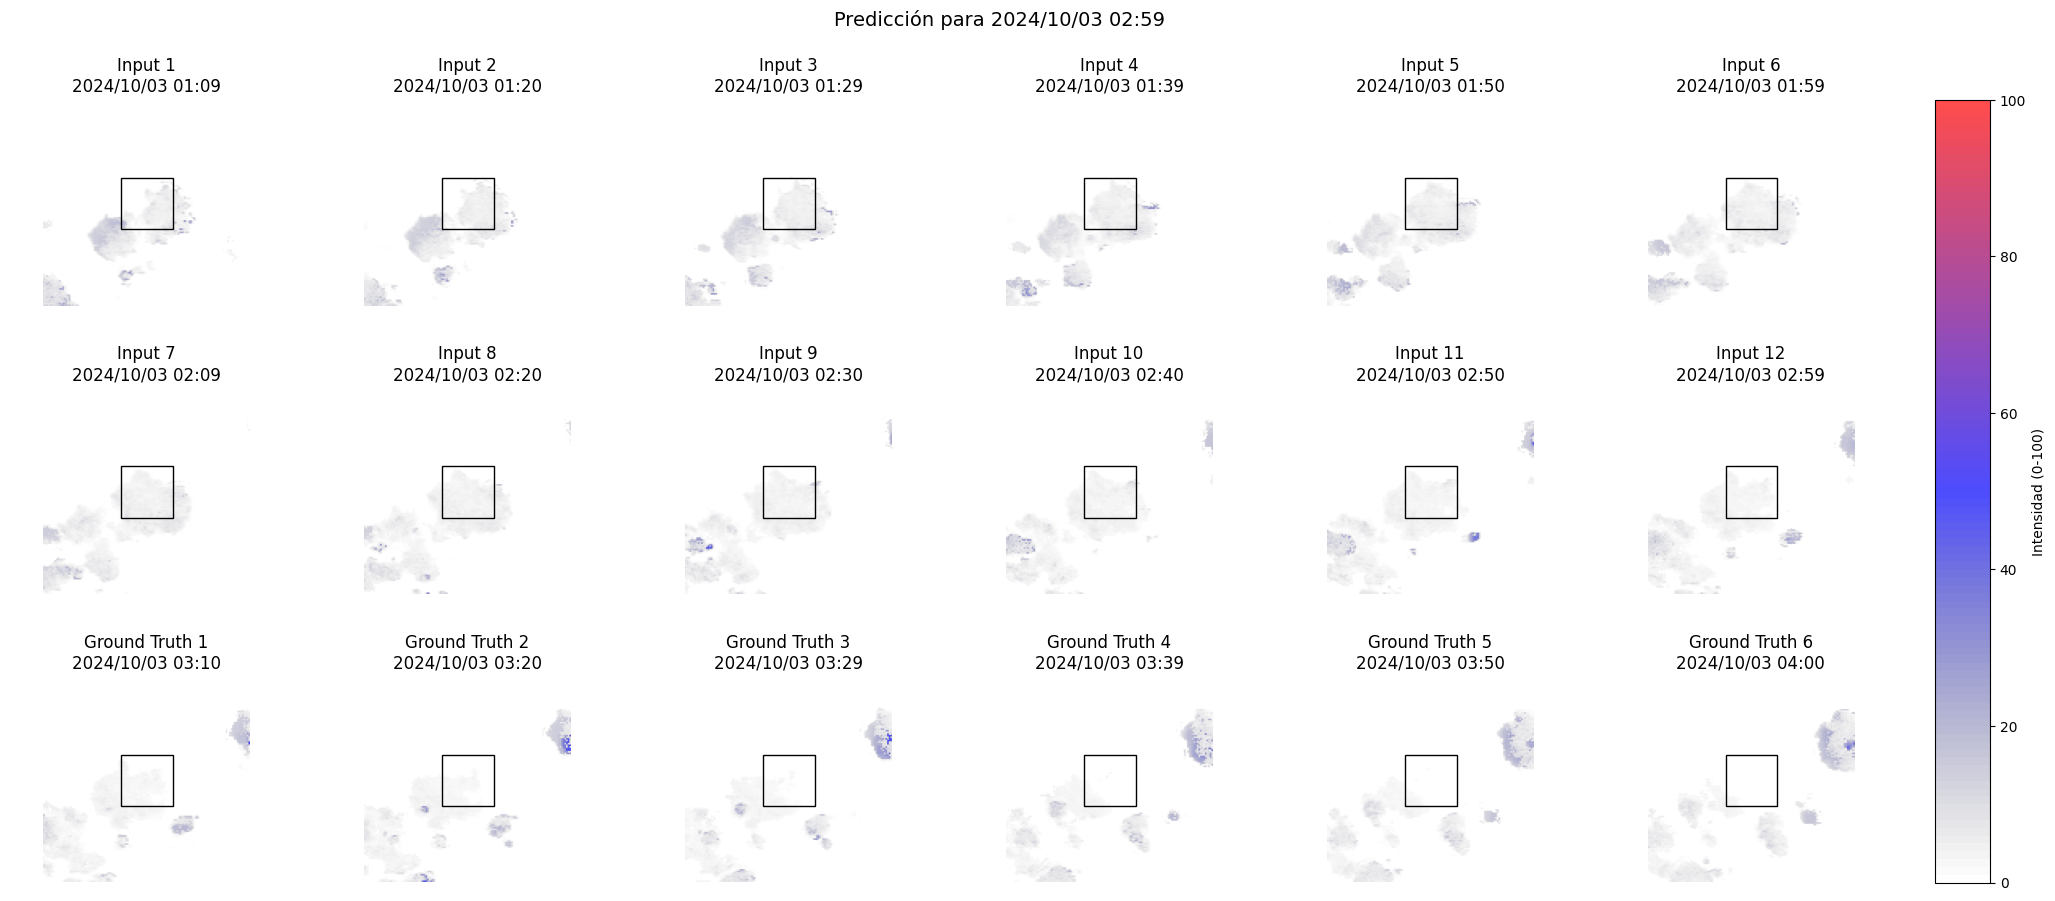

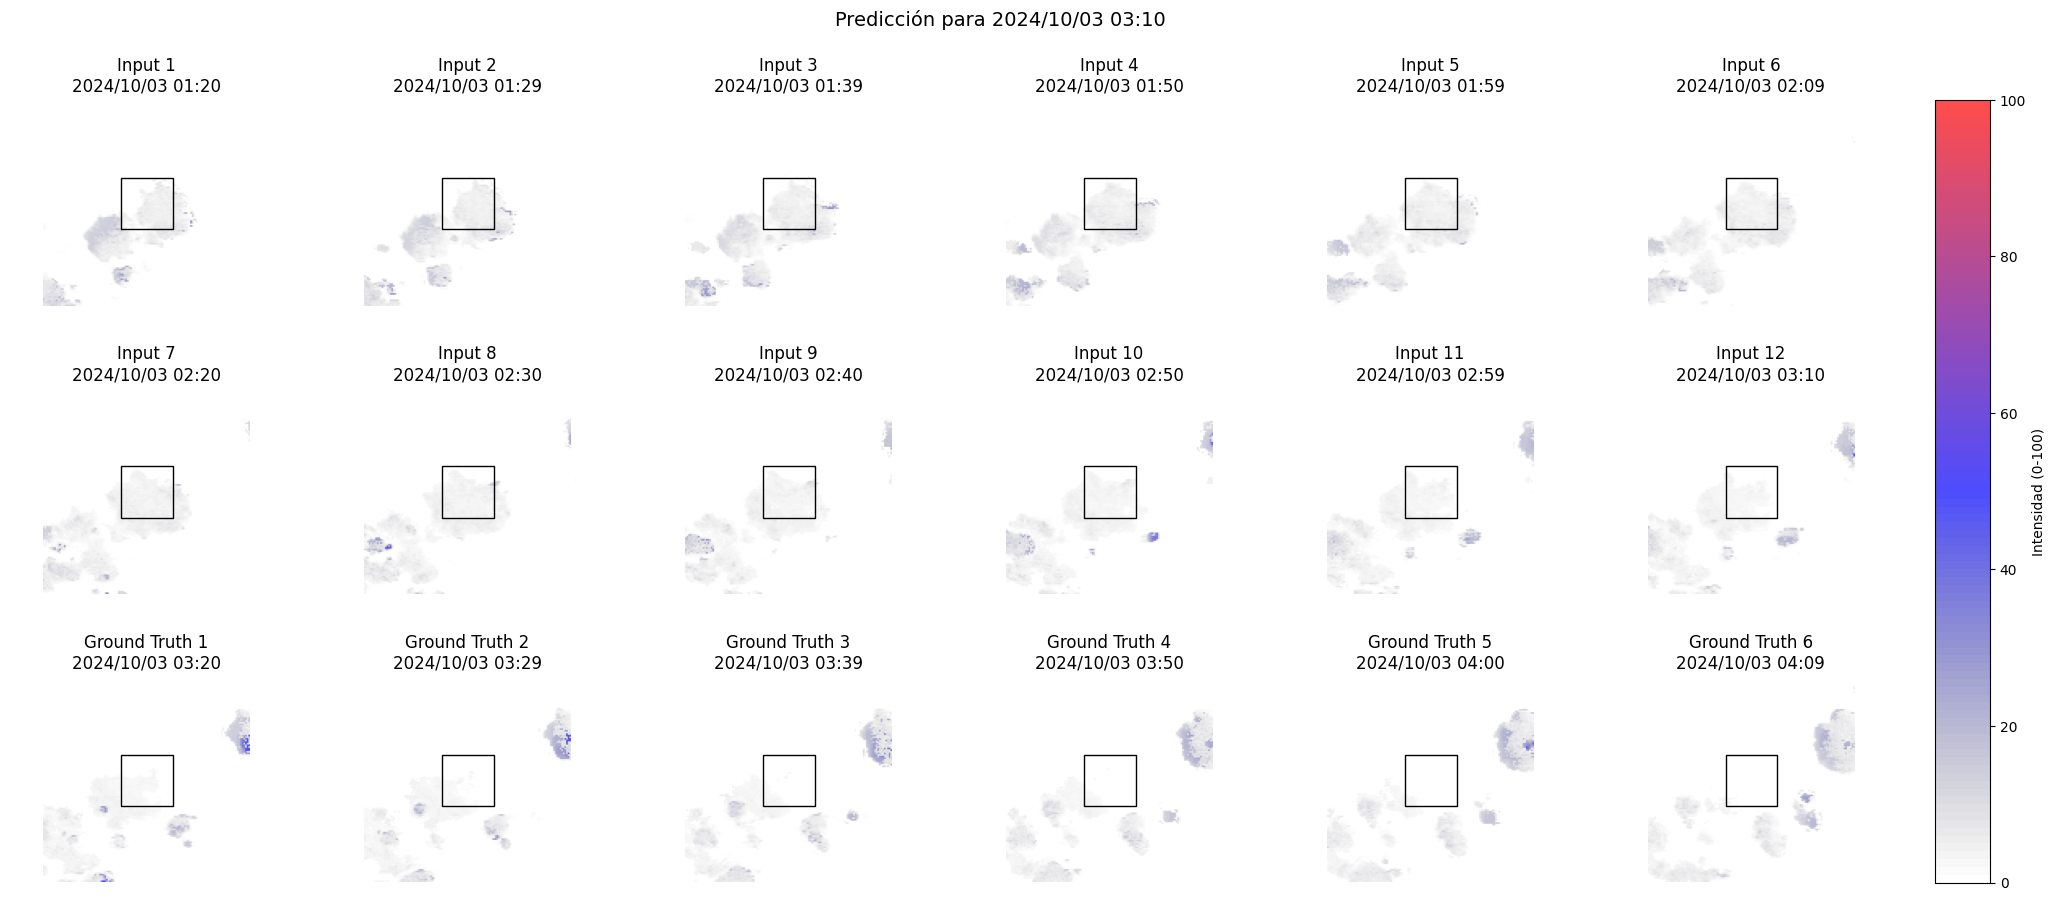

In [31]:
# Visualizar algunas secuencias de ejemplo
for idx in range(3):
    visualize_sequence(idx)
    print("\n" + "="*80 + "\n")

## Análisis de las Secuencias

Podemos ver que:
1. Las secuencias de entrada (12 frames) se muestran en la fila superior
2. Las secuencias objetivo (6 frames) se muestran en la fila inferior
3. Cada frame mantiene su timestamp original
4. La intensidad está normalizada entre 0 y 100
5. Se usa la misma paleta de colores que en el entrenamiento
6. El rectángulo rojo indica la región central (64x64) que se usa para filtrar las secuencias